In [1]:
#IMporting all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Problem 1

In [2]:
df1 = pd.read_csv('Wholesale+Customers+Data.csv',index_col=0) #importing dataset

### EDA

In [3]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338
2,Retail,Other,7057,9810,9568,1762,3293,1776
3,Retail,Other,6353,8808,7684,2405,3516,7844
4,Hotel,Other,13265,1196,4221,6404,507,1788
5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 440
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


<AxesSubplot:>

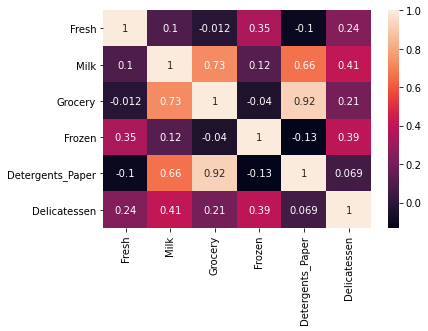

In [5]:
corr = df1.corr() #correlation heatmap
sns.heatmap(corr,annot=True)

In [6]:
df1.describe() 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [75]:
df1['Total']=df1.iloc[:,2:].sum(axis=1)

In [76]:
12669+9656+7561+21

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Buyer/Spender,,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338,67342
2,Retail,Other,7057,9810,9568,1762,3293,1776,75874
3,Retail,Other,6353,8808,7684,2405,3516,7844,88316
4,Hotel,Other,13265,1196,4221,6404,507,1788,54417
5,Retail,Other,22615,5410,7198,3915,1777,5185,87660


<AxesSubplot:ylabel='Region'>

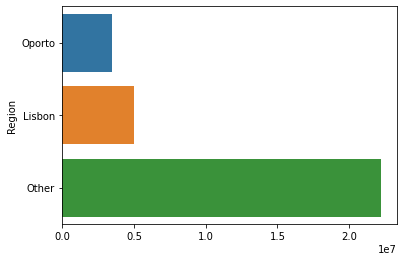

In [77]:
#Q1 which region spent the most & least
tempdata=df1.groupby('Region').sum()['Total'].sort_values() 
sns.barplot(y=tempdata.index,x=tempdata.values)

Text(0.5, 1.0, 'Channel')

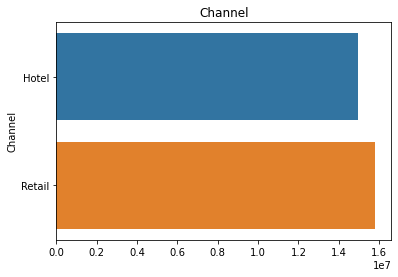

In [78]:
 #Q1 which channel spent the most & least
tempdata=df1.groupby('Channel').sum()['Total'].sort_values()
sns.barplot(y=tempdata.index,x=tempdata.values)
plt.title('Channel')

<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

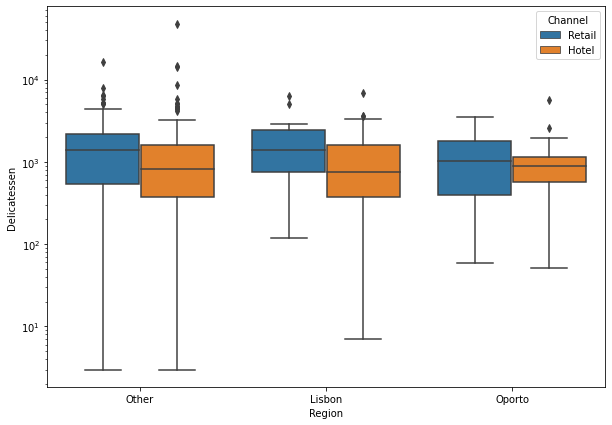

In [10]:
pd.get_option("display.max_columns") #Q2
plt.figure(figsize=[10,7])
plt.yscale('log')
sns.boxplot(data=df1,x='Region',y='Delicatessen',hue='Channel') 
#for different Items simply putting y='Item_Name' we can obtain the required boxplot

In [11]:
pd.pivot_table(data=df1,values=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicatessen'],
               index=['Region','Channel'],aggfunc=stats.variation) #coefficient of variation calculation

Delicatessen  Detergents_Paper     Fresh    Frozen   Grocery  \
Region Channel                                                                 
Lisbon Hotel        1.010366          1.362187  0.948436  1.038772  0.893848   
       Retail       0.844395          0.651707  1.012104  0.911902  0.547926   
Oporto Hotel        0.938370          0.865205  0.755994  1.957877  0.681008   
       Retail       0.836982          0.959034  0.917003  1.562595  0.836754   
Other  Hotel        2.406988          1.394922  1.060061  1.352192  0.922363   
       Retail       1.154817          0.868697  0.975375  0.989504  0.767229   

                    Milk  
Region Channel            
Lisbon Hotel    1.101167  
       Retail   0.595605  
Oporto Hotel    1.265113  
       Retail   0.700160  
Other  Hotel    1.289886  
       Retail   0.958414

<AxesSubplot:>

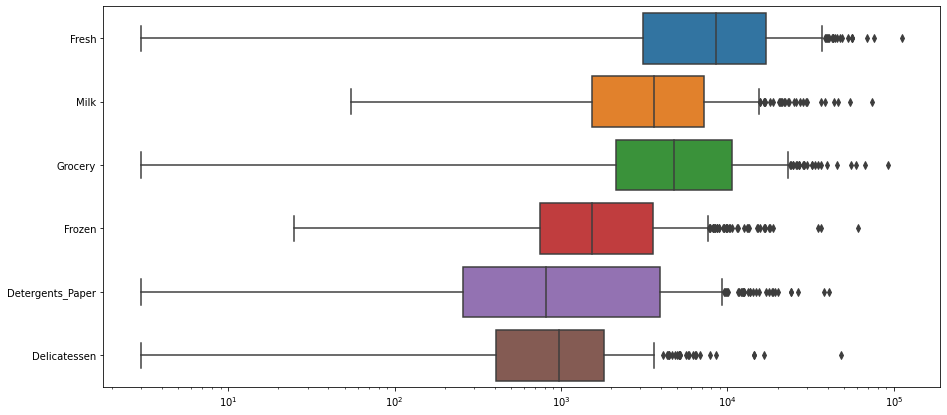

In [12]:
plt.figure(figsize=[15,7])
plt.xscale("log")
sns.boxplot(data=df1.drop('Total',axis=1),orient='h') #Q4 
#check for data dispersion and outliers

***********************************************

# Problem2

In [13]:
df2 = pd.read_csv('Survey-1.csv') #importing data set

### EDA

In [14]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [16]:
df2.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


<AxesSubplot:>

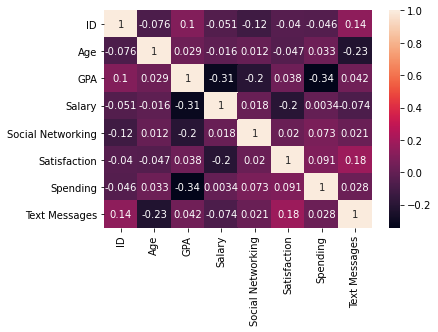

In [17]:
corr = df2.corr()
sns.heatmap(corr,annot=True)

In [18]:
pd.crosstab(index=df2['Gender'],columns=df2['Major']) #Q2.1.1 (Contingency Table between Gender and Major)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [19]:
pd.crosstab(index=df2['Gender'],columns=df2['Grad Intention'])#Q2.1.2 (Contingency Table between Gender and Grad Intention)

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [20]:
pd.crosstab(index=df2['Gender'],columns=df2['Employment'])#Q2.1.3 (Contingency Table between Gender and Employment)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [21]:
pd.crosstab(index=df2['Gender'],columns=df2['Computer'])#Q2.1.4 (Contingency Table between Gender and Computer)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [22]:
df2.groupby('Gender').count()['ID'] #getting the no. of males and females

Gender
Female    33
Male      29
Name: ID, dtype: int64

In [23]:
# probability that a randomly selected CMSU student will be male is equal to
P_m=29/(29+33) #Q2.2.1

In [24]:
P_f=33/(29+33) # probability that a randomly selected CMSU student will be female is equal to #Q2.2.2

In [25]:
a=pd.crosstab(index=df2['Gender'],columns=df2['Major']) #Q2.3.1
a['Total']=a[a.columns].sum(axis=1)
a

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29


Major
Management                0.206897
Retailing/Marketing       0.172414
Accounting                0.137931
Economics/Finance         0.137931
Other                     0.137931
Undecided                 0.103448
International Business    0.068966
CIS                       0.034483
Name: Male, dtype: float64


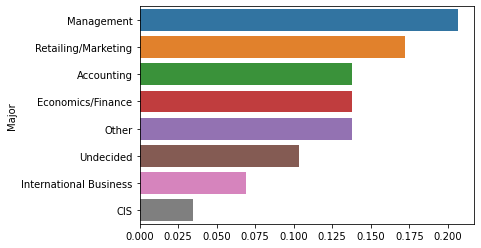

In [26]:
tempdata=(a.loc['Male']/a['Total'][1]).sort_values(ascending=False).drop('Total') #Q2.3.1
print(tempdata)
sns.barplot(y=tempdata.index,x=tempdata.values); #the conditional probability of different majors among the male students of CMSU

Major
Retailing/Marketing       0.272727
Economics/Finance         0.212121
International Business    0.121212
Management                0.121212
Accounting                0.090909
CIS                       0.090909
Other                     0.090909
Undecided                 0.000000
Name: Female, dtype: float64


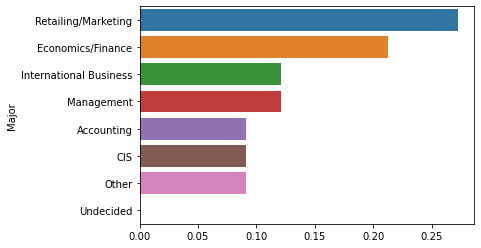

In [27]:
tempdata=(a.loc['Female']/a['Total'][0]).sort_values(ascending=False).drop('Total')#Q2.3.2
print(tempdata)
sns.barplot(y=tempdata.index,x=tempdata.values); #the conditional probability of different majors among the female students of CMSU

In [28]:
a=pd.crosstab(index=df2['Gender'],columns=df2['Grad Intention']) #Q2.4.1
a['Total']=a[a.columns].sum(axis=1)
a

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29


Grad Intention
Yes          0.586207
Undecided    0.310345
No           0.103448
Name: Male, dtype: float64


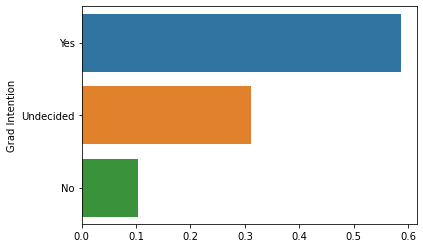

In [29]:
tempdata=(a.loc['Male']/a['Total'][1]).sort_values(ascending=False).drop('Total') #Q2.4.2
print(tempdata)
sns.barplot(y=tempdata.index,x=tempdata.values); #the probability That a randomly chosen student is a male and intends to graduate.

In [30]:
a=pd.crosstab(index=df2['Gender'],columns=df2['Computer']) #Q2.4.2
a['Total']=a[a.columns].sum(axis=1)
a

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29


Computer
Laptop     0.878788
Desktop    0.060606
Tablet     0.060606
Name: Female, dtype: float64


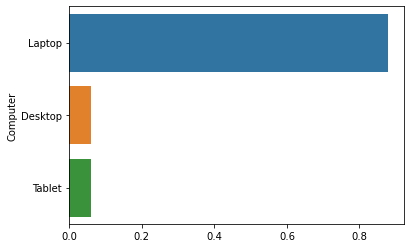

In [31]:
tempdata=(a.loc['Female']/a['Total'][0]).sort_values(ascending=False).drop('Total') #Q2.4.2
print(tempdata)
sns.barplot(y=tempdata.index,x=tempdata.values);
#the probability That a randomly chosen student is a female and does NOT have a laptop

In [32]:
a=pd.crosstab(index=df2['Gender'],columns=df2['Employment']) 
a['Total']=a[a.columns].sum(axis=1)
a

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29


### the probability that a randomly chosen student is either a male or has full-time employment?

P(M $\cup$ FE) = P(M) + P(FE) - P(M $\cap$ FE)

In [33]:
P_m #Q2.5.1

0.46774193548387094

In [34]:
P_fe = sum(a.iloc[:,0])/ sum(a.iloc[:,-1]) 

In [35]:
P_fe

0.16129032258064516

In [36]:
P_m_u_fe = P_m + P_fe - (7/62)

In [37]:
P_m_u_fe #Q2.5.1

0.5161290322580645

### the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

P(Busi $\cup$ Mgmt) = P(Busi) + P(Mgmt) - P(Busi $\cap$ Mgmt)

In [38]:
a=pd.crosstab(index=df2['Gender'],columns=df2['Major']) 
a['Total']=a[a.columns].sum(axis=1)
print(a.iloc[0,:]/a.iloc[0,-1])
a

Major
Accounting                0.090909
CIS                       0.090909
Economics/Finance         0.212121
International Business    0.121212
Management                0.121212
Other                     0.090909
Retailing/Marketing       0.272727
Undecided                 0.000000
Total                     1.000000
Name: Female, dtype: float64


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29


In [39]:
P_Busi_f = 4/33
P_Mgmt_f = 4/33
P_Busi_n_Mgmt_f = 0

In [40]:
P_Busi_r_Mgmt_f = P_Busi_f+P_Mgmt_f-P_Busi_n_Mgmt_f

In [41]:
P_Busi_r_Mgmt_f#Q2.5.2

0.24242424242424243

### a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No).

In [42]:
a=pd.crosstab(index=df2['Gender'],columns=df2['Grad Intention']) #Q2.6
a=a.drop('Undecided',axis=1)

In [43]:
a

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


### A student is chosen randomly, what is the probability that his/her GPA is less than 3??

In [44]:
df2.head() #Q2.7

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [45]:
a=df2['GPA'].sort_values().reset_index()
a[a['GPA']==3.0].index.max()+1

24

In [46]:
24/62 #2.7

0.3870967741935484

###  Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more

In [47]:
P_m #2.8

0.46774193548387094

In [48]:
# P(em>50) = ?
a = df2[df2['Gender']=='Male']['Salary']

In [49]:
sum(a>50)

10

In [50]:
P_em = 10/29 #29 males 33 females
P_em

0.3448275862068966

In [51]:
a = df2[df2['Gender']=='Female']['Salary']

In [52]:
sum(a>50)

13

In [53]:
P_ef = 13/33 #29 males 33 females
P_ef

0.3939393939393939

### For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

Assuming the significance level to be **0.05**.

In [54]:
x= df2['GPA']
t,p=stats.shapiro(x)
p #>0.05

0.11204058676958084

In [55]:
x= df2['Salary']
t,p=stats.shapiro(x)
p #<0.05

0.028000956401228905

In [56]:
x= df2['Spending']
t,p = stats.shapiro(x)
p #<0.05

1.6854661225806922e-05

In [57]:
x= df2['Text Messages']
t,p=stats.shapiro(x)
p #<0.05

4.324040673964191e-06

In [58]:
df2.groupby('Gender').describe()['Salary']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,33.0,48.787879,13.272405,30.0,40.0,50.0,55.0,80.0
Male,29.0,48.275862,10.793174,25.0,40.0,47.0,55.0,80.0


In [59]:
df2['Satisfaction'].value_counts()

4    26
3    15
5    10
1     5
6     4
2     2
Name: Satisfaction, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Text Messages'>

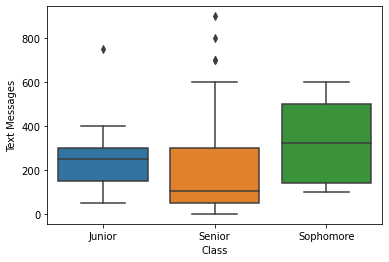

In [60]:
sns.boxplot(data=df2,y='Text Messages',x='Class')

********************************

# Problem 3

In [61]:
df3 = pd.read_csv('A+&+B+shingles.csv') #importing dataset

In [62]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


* Null Hypothesis $H_0 : \mu_A$ = 0.35
* Alternative Hypothesis $H_A : \mu_A$ <0.35 

In [63]:
from scipy.stats import ttest_1samp, ttest_ind

In [64]:
ts,pval = ttest_1samp(df3['A'],0.35)

In [65]:
ts,pval #for detailed analysis please refer to report attached

(-1.4735046253382782, 0.14955266289815025)

since p-value is 0.1495;
thus we do not have enough evidence to reject the null hypothesis in favor of alternative hypothesis at the significance level of 0.05

* Null Hypothesis $H_0 : \mu_B$ = 0.35
* Alternative Hypothesis $H_A : \mu_B$ <0.35

In [66]:
ts,pval = ttest_1samp(df3['B'].dropna(),0.35)
ts,pval

(-3.1003313069986995, 0.004180954800638363)

since p-value is 0.00418095; thus we have enough evidence to reject the null hypothesis in favor of alternative hypothesis at the significance level of 0.05

### Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?
* Null Hypothesis $H_0 : \mu_A = \mu_B$
* Alternative Hypothesis $H_A : \mu_A \neq \mu_B$

In [67]:
print(df3['A'].std()**2-df3['B'].std()**2)
#check for difference in variance of the two samples 

-0.0004274654377880299


In [68]:
ts,pval= ttest_ind(df3['A'],df3['B'].dropna())

In [69]:
ts,pval/2

(1.289628271966112, 0.1008748285917664)

since p-value is 0.1008748285917664; thus we do not have enough evidence to reject the null hypothesis in favor of alternative hypothesis at the significance level of 0.05

****************************

# THANK YOU!